# 215001 서가연
- chapter 02. end to end ML project 
- 캘리포니아 인구조사 데이터를 사용하여 캘리포니아의 주택 가격 모델 만들기(중간 주택 가격 예측)
- > 지도학습 => 다중 회귀 문제
- > 성능측정 => RMSE 사용 

### 0. Install Dependencies 


In [334]:
# 필요한 모듈 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


### 1. 데이터 로드하기 
  
- 데이터셋 출처 : https://github.com/rickiepark/handson-ml2/tree/master/datasets/housing
- 데이터 정보 : housing.csv(모든 데이터), housing.tgz(csv를 압축한 파일)
- tgz 파일을 불러와 압축을 푼 뒤 csv 파일 얻기 => 함수 작성
- csv 파일을 pandas로 데이터 읽기 => 함수 작성

In [335]:
import os
import tarfile  # tar 아카이브를 읽고 쓰는 데 필요한 라이브러리
import urllib.request # 인터넷 리소스에 접근하는 라이브러리

DATA_PATH = os.path.join("datasets", "housing") # 현재 프로젝트 위치에 데이터를 저장할 경로 작성
DATA_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/housing/housing.tgz" # housing.tgz 파일주소 
 
def fetch_data(data_url = DATA_URL, data_path= DATA_PATH):
    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
        
    tgz_path = os.path.join(DATA_PATH, "housing.tgz")  
    urllib.request.urlretrieve(data_url, tgz_path)  # housing.tgz 파일 저장
    housing_tgz = tarfile.open(tgz_path)    # housing.tgz 파일 불러오기
    housing_tgz.extractall(path=data_path)  # 압축 풀기 
    housing_tgz.close()
        

fetch_data()


In [336]:
# 판다스로 데이터 읽기 

def load_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "housing.csv")
    return pd.read_csv(csv_path)


a215001 = load_data()  # csv 파일을 판다스 데이터프레임 객체로 저장 

참고: 판다스 데이터 프레임 공식 doc
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html


### 2. 데이터 탐색

In [337]:
a215001.head()  # 상위 5개의 데이터 반환

# 각 열은 특성 => 10개의 feature 
# 각 행은 하나의 구역 (데이터 추출을 위한 최소의 지리적 단위)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [338]:
a215001.info()  

# 데이터에 대한 설명 : 전체 행 개수는 20640
# 전체 column : 총 10개의 특성
# null값 : total_berooms 제외하고 결측값이 없음
# 데이터 타입 : ocean_proximity만 object형이고 나머지는 모두 수치형 데이터 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [339]:
# 범주형 특성값인 ocean_proximity의 각 카테고리와 카테고리별 행의 개수 파악
a215001["ocean_proximity"].value_counts()

# 총 5개의 카테고리 : <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [340]:
a215001.describe()  # 수치형 데이터의 요약 정보(기술통계량)

# count : 총 행의 개수(null값을 제외하고)
# mean : 평균, std : 표준편차, min : 최소값, max : 최대값
# 25%, 50%, 75% : 백분위수(백분율이 속하는 하위부분의 값)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2. 데이터 분포 출력
- 모든 수치형 데이터에 대한 히스토그램 출력 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3BBE19370>,
      dtype=object)

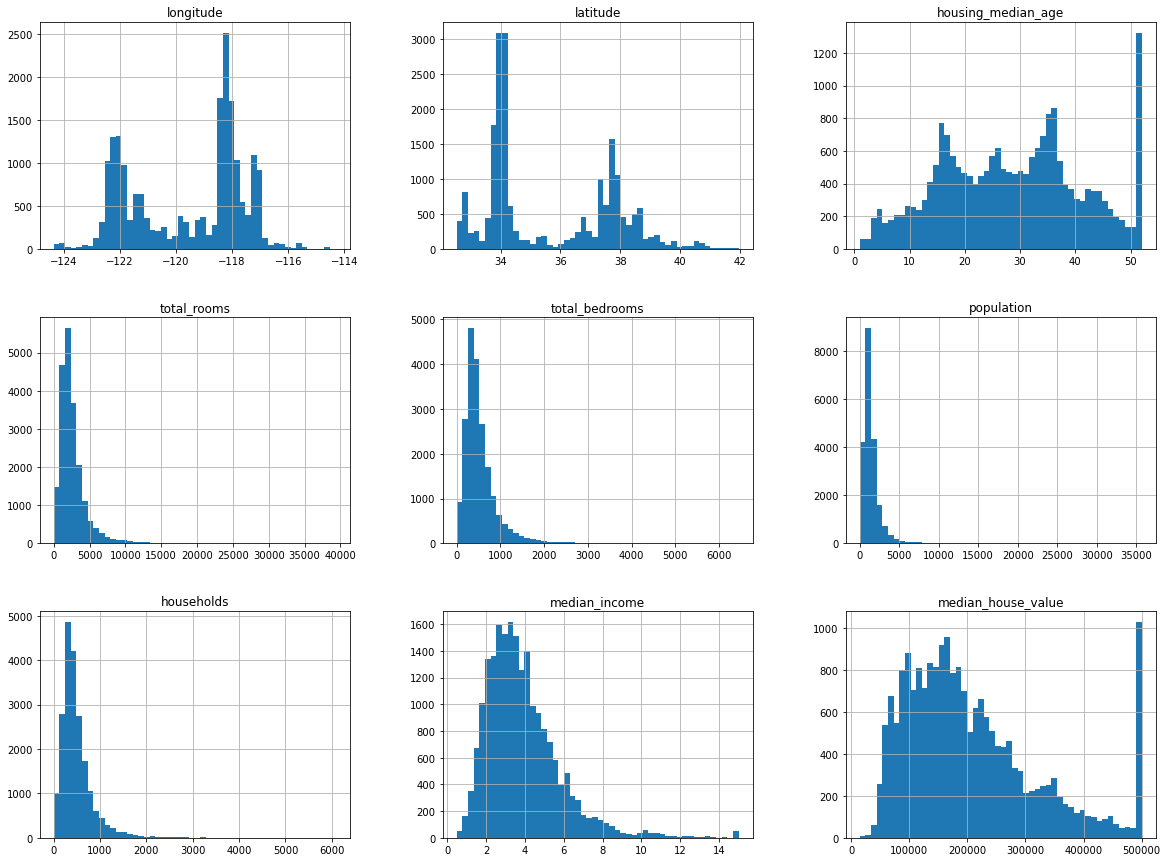

In [341]:
# bins: 막대 개수(높을수록 정밀하게 묘사) , figsize: 그림 사이즈
a215001.hist(bins=50, figsize=(20, 15)) 

# housing_median age, median_house_value: 최대값과 최소값이 한정되어 있음 
# target값이 median house value이므로 예측값도 최대값을 넘지 않도록 한다 => 정확한 예측값 도출 or 제거
# 특성들의 스케일(범위)이 제각각
# 히스토그램의 오른쪽 꼬리가 더 두꺼움(데이터 분포가 좌측으로 쏠려있음) => 종 모양의 분포가 되도록 변형 필요

### 3. 데이터 분리(Train/Test)
- **데이터 스누핑 편향(data snooping bias)**을 막기위해 test set을 분리하는 작업이 필요함 : test set은 들여다보지 않기
- 사이킷런의 train_test_split() 사용 
- 참고) 사이킷런 model_seleection 관련 공식 doc : https://scikit-learn.org/stable/auto_examples/index.html#model-selection


- > 랜덤 샘플링 : 무작위로 데이터셋을 샘플링하면, 샘플링 편향이 생길 가능성이 큼
- > **계층적 샘플링** : 데이터 샘플을 잘 표현할 수 있는 올바른 수의 샘플 추출

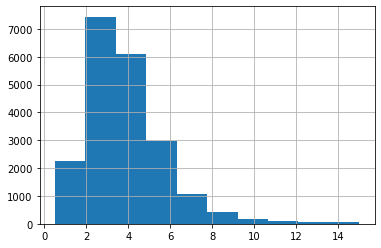

In [342]:
# 중간 소득이 중간주택가격을 예측하는데 매우 중요한 자료라고 가정(전문가 의견)
# 중간 소득의 카테고리 특성에 따라 샘플링

a215001["median_income"].hist()

In [343]:
# median_income에서 pd.cut을 통해 총 5개의 카테고리 특성 생성 (1~5까지의 레이블)
a215001["income_cat"] = pd.cut( a215001["median_income"], 
                               bins= [0, 1.5, 3.0, 4.5, 6, np.inf], 
                               labels=[1, 2, 3, 4, 5]) 

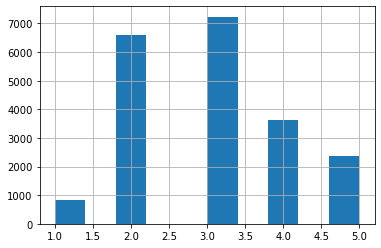

In [344]:
a215001["income_cat"].hist()  # x축 : 레이블(1~5)

In [345]:
# 판다스 데이터 프레임에서 income_cat cloumn이 생성된 것을 확인 
a215001.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [346]:
# 계층적 샘플링 : sklearn에 있는 함수를 이용
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

# 각 분할 결과의 index를 바탕으로 strat_train_set과 strat_test_set 생성 
for train_index, test_index in split.split(a215001, a215001["income_cat"]):
    strat_train_set = a215001.loc[train_index] 
    strat_test_set = a215001.loc[test_index] 


In [347]:
# 총 20640개의 데이터가 8(train) : 2(test)로 분리됨 
print(strat_train_set.shape)
print(strat_test_set.shape)

(16512, 11)
(4128, 11)


In [348]:
# train_set의 소득카테고리별 비율
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

print('-'*40)

# 전체 데이터의 각 계층별 비율
print(a215001["income_cat"].value_counts() / len(a215001))


3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64
----------------------------------------
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64



train_set의 계층 분할 비율과 전체 dataset의 계층 분할 비율을 비교 => 거의 같은 비율을 가짐(의도대로 분할이 잘 된 것을 확인)

In [349]:
# income_cat column은 이제 필요없으므로 drop을 사용하여 제거

for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True) 
    
# axis=1: 열방향, axis=0: 행방향
# inplace(True) : 새로운 데이터 프레임 재할당

### 4. 상관관계 분석

In [350]:
# train_set로만 탐색
# 원본 세트를 손상시키지 않기 위해 복사본을 생성 => copy() 이용 
a215001 = strat_train_set.copy() 

In [351]:
# label 따로 보관
label =  strat_train_set['median_house_value'].copy()

In [352]:
a215001.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [353]:
# 각 column간 표준상관계수(피어슨 상관계수)를 확인 => corr() 이용
corr_matrix = a215001.corr() 


In [354]:
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [355]:
# 중간주택가격(target)을 기준으롤 상관 관계 분석
corr_matrix["median_house_value"].sort_values(ascending=False) # 내림차순 

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

상관관계
- -1~1까지의 값
- 1에 가까우면 양의 상관관계, -1에 가까우면 음의 상관관계, 0이면 아무런 관계 없음 
- 피어슨 상관계수는 선형관계만 파악가능 => 반드시 관련이 있다/없다고 판단하기 어려움 
> ![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)



### 5. 특성 조합
- 여러 특성의 조합을 실험

In [356]:
# 가구수 대비 방 개수
a215001["rooms_per_household"] = a215001["total_rooms"] / a215001["households"] 

# 전체 방 개수 대비 침실 수
a215001["bedrooms_per_room"] = a215001["total_bedrooms"] / a215001["total_rooms"]

# 가구수 대비 인구 수
a215001["population_per_household"]= a215001["population"] / a215001["households"]

In [357]:
a215001.columns  # 새로운 특성값 추가확인 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [358]:
# 새로운 특성을 포함하여 상관관계 확인

corr_matrix = a215001.corr() 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 4. 데이터 전처리 ##

#### 4-1. 결측값 처리

- total_bedrooms column에 대한 결측값 처리 
1. 해당 구역 제거(행 제거) : dropna

2. 전체 특성 제거(column 없애기) : drop
   
3. 다른 특정 값으로 채우기(중앙값, 최빈값, 평균값, KNN 등) : fillna 


In [359]:
# 지도학습은 반드시 정답이 필요함
# 특성 데이터(feature)와 정답 데이터(label)을 분리하여 저장

a215001 = strat_train_set.drop("median_house_value", axis=1)  # 훈련 세트를 위해 레이블 삭제
a215001_labels = strat_train_set["median_house_value"].copy()


In [360]:
a215001[a215001.isnull().any(axis=1)].head()   # NaN : Not a Number

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


- **SimpleImputer**를 적용하여 중앙값으로 결측값 채우기 => 나중에 새로운 데이터가 들어오더라도 똑같이 처리되기 때문에 편함.
- 수치형 데이터에만 적용가능하므로, 범주형 데이터('ocean_proximity')는 제거 후 imputing 작업 진행

In [361]:
# 수치형 데이터만 가지는 데이터 복사본 생성 
a215001_num = a215001.drop("ocean_proximity", axis=1)

In [362]:
# SimpleImputer를 사용하여 null값을 중앙값(median)으로 채우기 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(a215001_num)


SimpleImputer(strategy='median')

In [363]:
# SimpleImputer로 계산한 중앙값 반환 
imputer.statistics_ 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [364]:
a215001_num.median().values

# 직접 계산한 것과 동일한 결과 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

훈련 세트를 변환 => 넘파이 배열로 

In [365]:
X = imputer.transform(a215001_num)
print(type(X))

<class 'numpy.ndarray'>


In [366]:
# 넘파이 배열을 DataFrame으로 변환
a215001_df =  pd.DataFrame(X, columns = a215001_num.columns, index = a215001_num.index)

# imputing 후 결측값 확인 
a215001_df.isnull().sum() 

# 결측값 없음 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

#### 4-2. 범주형 데이터  
- object형인 ocean_proximity column에 대한 전처리

In [367]:
# 범주형 데이터 지정
a215001_cat = a215001[["ocean_proximity"]]

In [368]:
a215001_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [369]:
# OrdinalEncoder 사용하여 범주형 카테고리(text)를 숫자형으로 변환
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

# fit하고 transform
a215001_cat_encoded = ordinal_encoder.fit_transform(a215001_cat)  

# 결과 확인
a215001_cat_encoded[:10]


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [370]:
# 카테고리 목록 확인
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**원-핫 인코딩(one-hot encoding)**
- 순서가 있는 카테고리는 별로 좋지 않음 => 이진 특성을 만들어 해결가능
- 즉, 한 특성만 1이고 나머지는 0으로 만들어짐 

In [371]:
# One-Hot encoding 사용
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)  # 밀집행렬을 반환하도록 지정 (아니면 scipy의 희소행렬이 출력됨)
a215001_cat_onehot = cat_encoder.fit_transform(a215001_cat)

a215001_cat_onehot # np.ndarray의 2차원배열


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### 5. 파이프라인 설계

- 사용자 정의 변환기

In [372]:
# 수치형 데이터 전처리를 위한 파이프라인

from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), # (이름, 추정기) 튜플 한쌍으로 표현
    ('std_scaler', StandardScaler())
    ])

a215001_num_tr = num_pipeline.fit_transform(a215001_num) # 파이프라인을 하나의 변환기로 사용

In [373]:
a215001_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

In [374]:
# 하나의 변환기를 사용하여 각 column별 다른 변환을 적용
from sklearn.compose import ColumnTransformer 

num_attribs = list(a215001_num) # 수치형 데이터
cat_attribs = ["ocean_proximity"] # 범주형 데이터 

# 전체 파이프라인
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # 수치형 데이터 파이프라인을 적용
        ("cat", OneHotEncoder(), cat_attribs), # 범주형 데이터에 OneHotEncoder 적용
    ])

# 파이프라인을 housing 데이터에 적용
a215001_prepared = full_pipeline.fit_transform(a215001) # 하나의 파이프라인으로 전처리 작업 완료 


In [375]:
a215001_prepared.shape  

(16512, 13)

### 6. 모델링

#### 6-1 선형회귀모델

In [376]:
from sklearn.linear_model import LinearRegression

# 모델 생성
lr = LinearRegression()

# 모델 학습 
lr.fit(a215001_prepared, label)  


LinearRegression()

In [377]:
#  모델 평가 : RMSE 성능 평가 
from sklearn.metrics import mean_squared_error

a215001_lr_pred = lr.predict(a215001_prepared)
lr_rmse = mean_squared_error(label, a215001_lr_pred, squared=False) # squared=False로 함수를 호출하면 바로 RMSE 얻을 수 있음 

print(lr_rmse)
# 오차 : 69055 => 과소적합(모델 성능이 좋지 않다)
# 해결 방법 : 좋은 특성을 찾거나 생성, 모델 규제를 감소하기 

69055.07499157725


In [378]:
# MAE 평가

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(label, a215001_lr_pred)
lin_mae


49930.24012839147

#### 6-2. 결정트리모델

In [379]:
# 결정 트리 모델 생성
from sklearn.tree import DecisionTreeRegressor

# 모델 생성 (랜덤시드값 설정)
dt = DecisionTreeRegressor(random_state=42) 

# 모델 학습
dt.fit(a215001_prepared, label)

DecisionTreeRegressor(random_state=42)

In [380]:
a215001_dt_pred = dt.predict(a215001_prepared)

dt_rmse = mean_squared_error(label, a215001_dt_pred, squared=False)

print(dt_rmse) 
# 오차가 0? => 좋은 게 아님(과대적합)


0.0


#### 6-3. 랜덤포레스트

In [381]:
from sklearn.ensemble import RandomForestRegressor

# 트리 개수는 100개(default)로 모델 생성 
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf.fit(a215001_prepared, label)

RandomForestRegressor(random_state=42)

모델 성능 평가 (RMSE)

In [382]:
# 모델 예측
a215001_rf_pred = rf.predict(a215001_prepared)

# 예측값과 정답 비교하여 rmse 평가 
rf_rmse = mean_squared_error(label, a215001_rf_pred, squared=False)

print(rf_rmse)

18381.60959473712


### 7. 교차 검증
- 과대적합을 피하는 방법
- test set을 여러 개의 서브셋으로 무작위 분할한 뒤 훈련/검증셋을 바꿔가며 평가
- 반복된 훈련이 적용됨


In [383]:
# 검증 전 성능을 확인시켜주는 함수 생성
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

#### 7-1. 선형회귀 교차검증

In [384]:
from sklearn.model_selection import cross_val_score

# scoring은 클수록 좋은 값으로 계산되기 때문에 => MSE의 음수값을 사용(neg 추가)
# cv = 10 : 10개의 서브셋으로 분할 (9개 훈련, 매번 다른 1개 평가) => 10개의 결과 

lr_scores = cross_val_score(lr, a215001_prepared, label, scoring="neg_mean_squared_error", cv=10) 
lr_rmse_scores = np.sqrt(-lr_scores) 

In [385]:
# 점수 확인
display_scores(lr_rmse_scores)


점수: [67448.76437671 67366.52448423 68394.30580119 74679.88153983
 68314.56738182 71628.61410355 65367.64803691 68571.62738037
 72475.63172585 68098.06828865]
평균: 69234.56331191088
표준 편차: 2660.8777703194664


#### 7-2. 결정트리 교차검증

In [386]:
dt_scores = cross_val_score(dt, a215001_prepared, label, scoring="neg_mean_squared_error", cv=10)
dt_rmse_scores = np.sqrt(-dt_scores)

In [387]:
# 점수 확인
display_scores(dt_rmse_scores)

점수: [66757.2013883  66708.05413959 71135.77592971 69317.58307062
 68729.37098167 75649.34082791 67043.83260349 70251.84122452
 69273.49135944 69161.37598811]
평균: 69402.78675133755
표준 편차: 2512.0648514114073


#### 7-3. 랜덤포레스트 교차검증

In [388]:
rf_scores = cross_val_score(rf, a215001_prepared, label, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

In [389]:
# 점수 확인
display_scores(rf_rmse_scores)

점수: [48029.48533981 46180.5842788  49223.75819862 50128.49951756
 49245.88299731 53012.54776749 48929.83322119 50553.69113261
 51238.86812275 49550.65072314]
평균: 49609.38012992901
표준 편차: 1743.4668169136653


In [390]:
# 각 모델별 RMSE를 출력해서 한번에 비교

print("선형회귀:", lr_rmse_scores.mean())
print("결정트리:", dt_rmse_scores.mean())
print("랜덤포레스트:", rf_rmse_scores.mean())


선형회귀: 69234.56331191088
결정트리: 69402.78675133755
랜덤포레스트: 49609.38012992901


### 8. 하이퍼파라미터 튜닝
- 하이퍼파라미터 : 사용자 지정이 가능한 매개변수

#### 8-1. 그리드탐색(Grid Search)
- 사이킷런의 GridSearhCV 사용
- 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가함 

In [391]:
from sklearn.model_selection import GridSearchCV

# 시도해볼만한 하이퍼파라미터 지정 => 18번의 조합 탐색 과정 
grid_param = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},     # 딕셔너리 형태로 표현(3*4 조합 시도)
    {'bootstrap' : [False], 'n_estimators': [3, 10], 'max_features' : [2, 3, 4]} # bootstrap은 False, 2*3 조합 시도
    ]

# 랜덤 포레스트 모델로 그리드 탐색 (5fold로 훈련 => 18*5번의 훈련)
grid_search = GridSearchCV(rf, grid_param, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(a215001_prepared, label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [392]:
# 가장 좋은 성능의 조합 확인
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [393]:
# 점수와 파라미터 조합 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# RMSE가 가장 낮은 경우 => 50028.060190761295 {'max_features': 6, 'n_estimators': 30}

65005.182970763315 {'max_features': 2, 'n_estimators': 3}
55582.91015494046 {'max_features': 2, 'n_estimators': 10}
52745.33887865031 {'max_features': 2, 'n_estimators': 30}
60451.18914812725 {'max_features': 4, 'n_estimators': 3}
53062.818497303946 {'max_features': 4, 'n_estimators': 10}
50663.79774079741 {'max_features': 4, 'n_estimators': 30}
57998.07162873506 {'max_features': 6, 'n_estimators': 3}
52042.04702364244 {'max_features': 6, 'n_estimators': 10}
50028.060190761295 {'max_features': 6, 'n_estimators': 30}
58308.44501796401 {'max_features': 8, 'n_estimators': 3}
52082.74313186547 {'max_features': 8, 'n_estimators': 10}
50165.81805010987 {'max_features': 8, 'n_estimators': 30}
62709.54311517104 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54062.01766032325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60613.541905953585 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53742.988651846914 {'bootstrap': False, 'max_features': 3, 'n_estimators

#### 8-2. 랜덤탐색(Random Search)
- randint를 이용하여 범위내 정수값을 균등분포로 추출
- 탐색공간이 방대할 경우, 그리드서치보다 효율적

In [394]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_param = {
        'n_estimators': randint(low=1, high=200), # 1~200의 랜덤 정수
        'max_features': randint(low=1, high=8), # 1~8의 랜덤 정수
        }

# 랜덤 포레스트로 랜덤 서치
# n_iter : 탐색하는 반복횟수
rnd_search = RandomizedSearchCV(rf, param_distributions=random_param,
                            n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42) #n inter == 탐색 수



rnd_search.fit(a215001_prepared, label)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B3BC4D02B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B406E57CD0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [395]:
# 가장 좋은 성능의 조합 확인
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [396]:
# 점수와 파라미터 조합 확인
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


49462.596134607906 {'max_features': 7, 'n_estimators': 180}
51676.97211565583 {'max_features': 5, 'n_estimators': 15}
50827.83871022729 {'max_features': 3, 'n_estimators': 72}
51117.698297994146 {'max_features': 5, 'n_estimators': 21}
49585.185219390754 {'max_features': 7, 'n_estimators': 122}
50836.040148806715 {'max_features': 3, 'n_estimators': 75}
50746.890270152086 {'max_features': 3, 'n_estimators': 88}
49788.190631507045 {'max_features': 5, 'n_estimators': 100}
50574.565725719985 {'max_features': 3, 'n_estimators': 150}
65153.787556165735 {'max_features': 5, 'n_estimators': 2}


### 9. 평가
- test set으로 최종 모델 평가하기 

In [397]:
# 특성 중요도 보기

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.23217663e-01, 1.11356292e-01, 4.78286833e-02, 3.52467654e-02,
       2.93564433e-02, 4.53191983e-02, 2.83807377e-02, 4.07868459e-01,
       2.00598018e-02, 1.36345702e-01, 5.79834167e-05, 6.93251602e-03,
       8.02975484e-03])

In [398]:
# 새로 추가한 특성

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식

# named_transformers : 파이프라인에서 특정 특징 참조
# cat : 범주형 특성을 원핫인코더로 변경하는 클래스

cat_encoder = full_pipeline.named_transformers_["cat"]

# 원핫인코딩의 카테고리의 특성 추출
# ocien_proximity

cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# sort 하여 특징의 중요도 보여주기

sorted(zip(feature_importances, attributes), reverse=True)

# median_income, inland, pop_per_hhold 등이 좋은 특징
# 범주형 값이 좋은 결과를 보여주지 못해 삭제 가능


[(0.40786845907794983, 'median_income'),
 (0.1363457019194639, 'pop_per_hhold'),
 (0.12321766261652732, 'longitude'),
 (0.11135629230575723, 'latitude'),
 (0.04782868332880397, 'housing_median_age'),
 (0.045319198270076334, 'population'),
 (0.035246765429525415, 'total_rooms'),
 (0.029356443266387613, 'total_bedrooms'),
 (0.02838073769027157, 'households'),
 (0.02005980181428337, 'rooms_per_hhold'),
 (0.008029754844640457, 'INLAND'),
 (0.006932516019638101, '<1H OCEAN'),
 (5.798341667501236e-05, 'bedrooms_per_room')]

In [399]:
# 모델 선정
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1) # feature
y_test = strat_test_set["median_house_value"].copy() # label

# fit(학습)하지 않고 transform만 적용
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [400]:
# 최종 오차

final_rmse

47362.98158022501

In [401]:
# 모델을 저장하기위해 사용

import joblib
my_model = full_pipeline

joblib.dump(my_model, "my_model.pkl")  # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl")  # DIFF
